In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


Load datasets

In [3]:

customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

Data Inspection

In [4]:
# Summaries and Statistics
print(customers.info())
print(products.info())
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

In [5]:
print("Inspect datasets")

print("Customers Dataset:\n", customers.head())

print("Products Dataset:\n", products.head())

print("Transactions Dataset:\n", transactions.head())


Inspect datasets
Customers Dataset:
   CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
Products Dataset:
   ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
Transactions Dataset:
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   


In [6]:

# Data Cleaning
print( "Check for missing values")
print("\nMissing values in Customers:\n", customers.isnull().sum())
print("Missing values in Products:\n", products.isnull().sum())
print("Missing values in Transactions:\n", transactions.isnull().sum())


Check for missing values

Missing values in Customers:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Missing values in Products:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Missing values in Transactions:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


 Exploratory Data Analysis

Customer Analysis:

Total number of customers: 200

Customers by Region:
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64
Product Analysis:

Total number of products: 100

Products by Category:
Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64
Transaction Analysis:

Total number of transactions: 1000

Total revenue: $ 689995.56

Customer Region Distribution:
 Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64

Products by Category  Distribution:
 Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


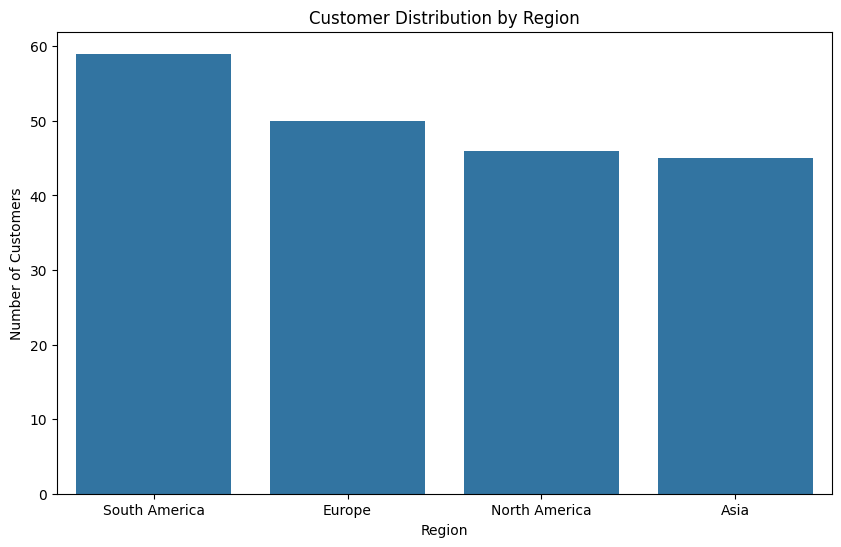

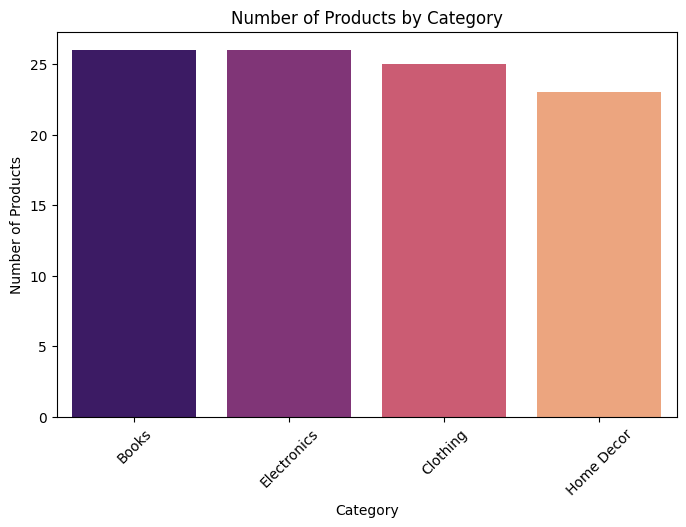

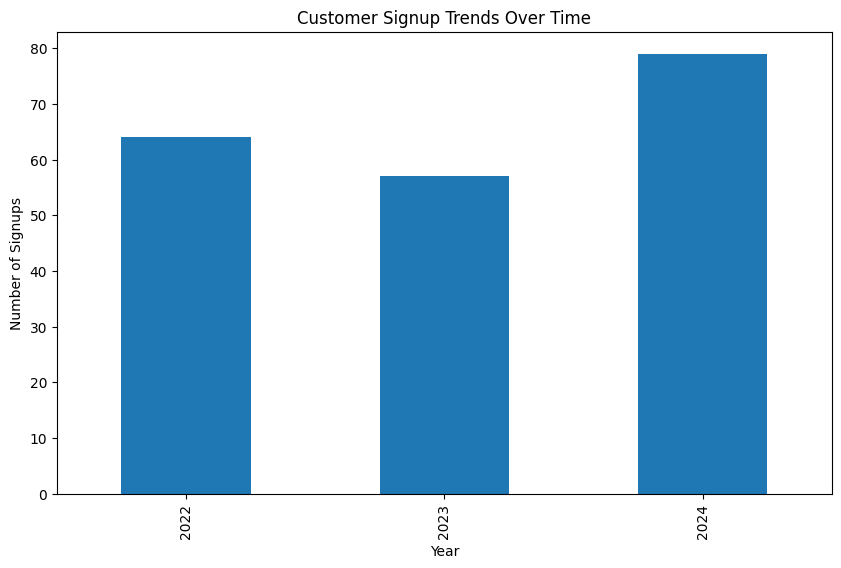

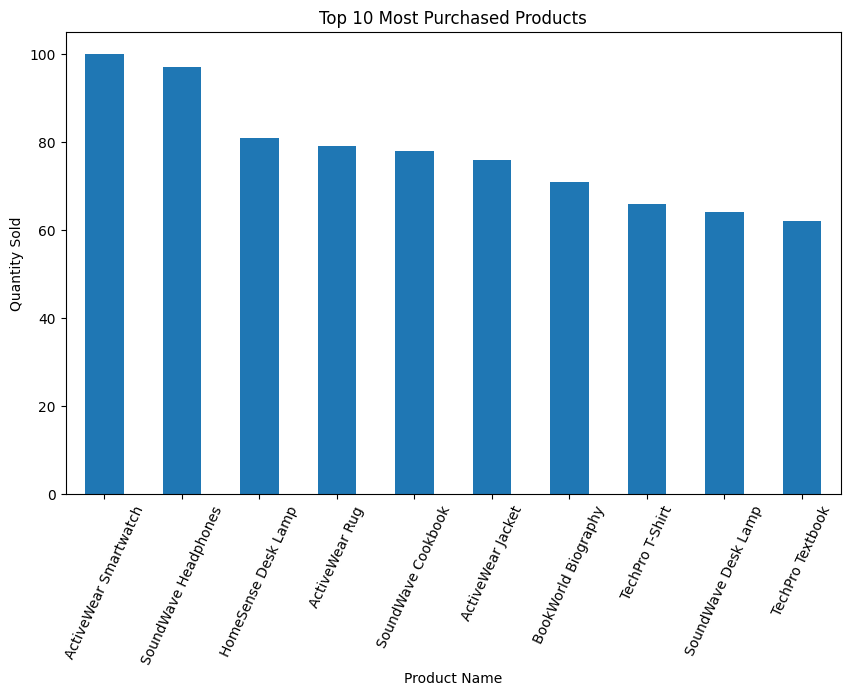

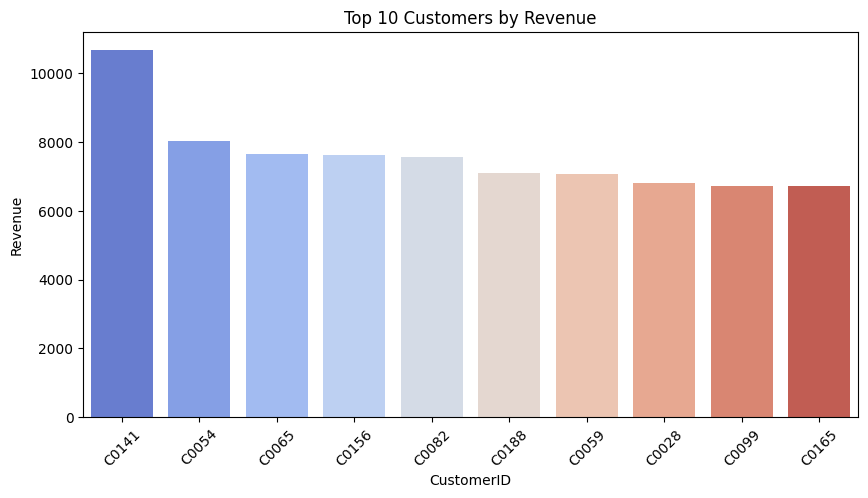

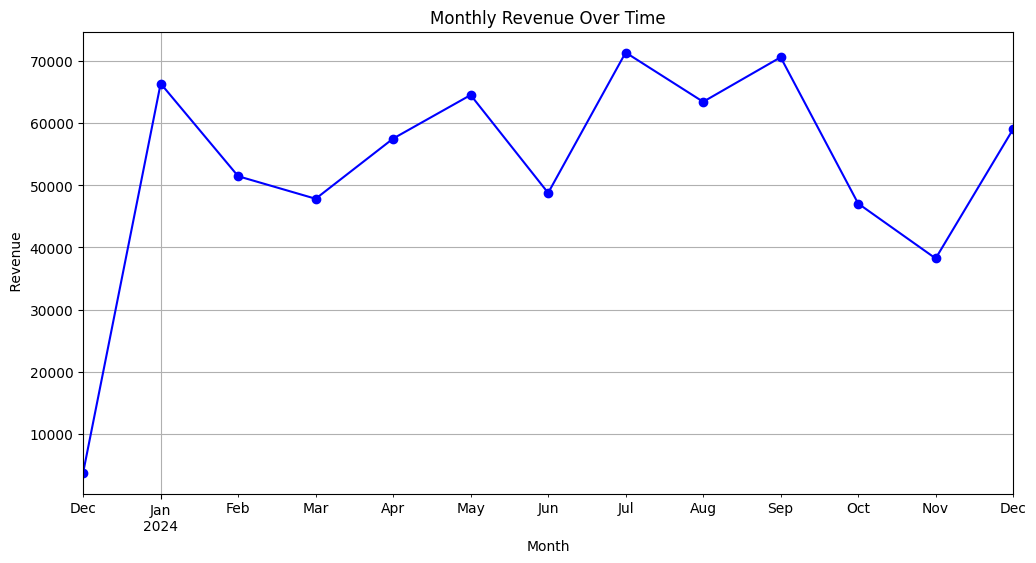

In [7]:
# Convert date columns to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Merge datasets for EDA
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')


# anlaysis 

print("Customer Analysis:")
print("\nTotal number of customers:", len(customers))
print("\nCustomers by Region:")
print(customers['Region'].value_counts())
   
print("Product Analysis:")
print("\nTotal number of products:", len(products))
print("\nProducts by Category:")
print(products['Category'].value_counts())
    

print("Transaction Analysis:")
print("\nTotal number of transactions:", len(transactions))
print("\nTotal revenue: $", transactions['TotalValue'].sum())
    

# EDA

## 1. no of  customers per region 
customer_region_dist = customers['Region'].value_counts()
print("\nCustomer Region Distribution:\n", customer_region_dist)

# 2. Product Analysis
products_by_category = products['Category'].value_counts()
print("\nProducts by Category  Distribution:\n",products_by_category )


## 3. Signup trends over time
customers['SignupYear'] = customers['SignupDate'].dt.year
signup_trends = customers['SignupYear'].value_counts().sort_index()

## 4. Most purchased products and categories
product_sales = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False)
category_sales = merged_data.groupby('Category')['Quantity'].sum().sort_values(ascending=False)

# 5. Top Customers
customer_revenue = merged_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)


## 6. Revenue trends
transactions['TransactionMonth'] = transactions['TransactionDate'].dt.to_period('M')
monthly_revenue = transactions.groupby('TransactionMonth')['TotalValue'].sum()


# Visualizations
plt.figure(figsize=(10, 6))
sns.barplot(x=customer_region_dist.index, y=customer_region_dist.values)
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(x=products_by_category.index, y=products_by_category.values, palette='magma')
plt.title('Number of Products by Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(10, 6))
signup_trends.plot(kind='bar')
plt.title('Customer Signup Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Signups')
plt.show()

plt.figure(figsize=(10, 6))
product_sales.head(10).plot(kind='bar')
plt.title('Top 10 Most Purchased Products')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=65)
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x=customer_revenue.index, y=customer_revenue.values, palette='coolwarm')
plt.title('Top 10 Customers by Revenue')
plt.xlabel('CustomerID')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
monthly_revenue.plot(kind='line', marker='o', color='blue')
plt.title('Monthly Revenue Over Time')
plt.xlabel('Month')
plt.ylabel(' Revenue')
plt.grid()
plt.show()

